# Correlations

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set_style('darkgrid'); sns.set_context('notebook')

In [2]:
df = pd.read_csv("parameters.csv")

In [3]:
fig_file = "corr_figs/"

## Approach Angle vs. Other Parameters

### 1\. Change in Body Axis due to Azimuth

In [4]:
c = ['indigo','darkorange','seagreen'] ##colours for the individuals

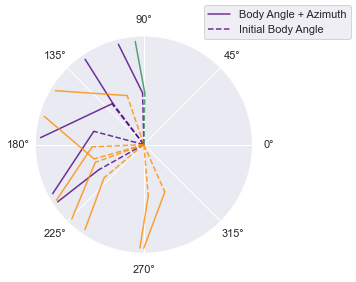

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = 'polar')
for i in range(np.shape(df)[0]):
    x0 = (df['approach_ang'].iloc[i]*np.pi/180); x1 = (df['approach_ang']+df['azimuth']).iloc[i]*np.pi/180
    plt.polar([x0,x1],[1,2],'-',color = c[int(df['ind'].iloc[i])-1],alpha = 0.8)
    plt.polar([x0,x0],[0,1],'--',color = c[int(df['ind'].iloc[i])-1],alpha = 0.8)
ax.set_yticklabels([])
ax.yaxis.grid(False)
plt.ylim([0,2.1])
fig.legend(['Body Angle + Azimuth','Initial Body Angle'], loc = 'upper right')
plt.show()

### 2\. Change in Body Axis due to Turn Angle

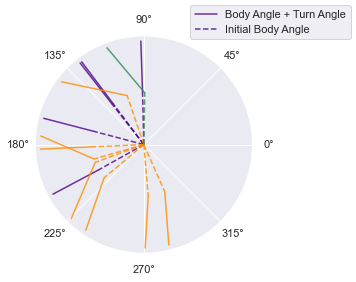

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = 'polar')
for i in range(np.shape(df)[0]):
    x0 = df['approach_ang'].iloc[i]*np.pi/180; x1 = (df['turn_ang']+df['approach_ang']).iloc[i]*np.pi/180
    plt.polar([x0,x1],[1,2],'-',color = c[int(df['ind'].iloc[i])-1],alpha = 0.8)
    plt.polar([x0,x0],[0,1],'--',color = c[int(df['ind'].iloc[i])-1],alpha = 0.8)
ax.set_yticklabels([])
ax.yaxis.grid(False)
fig.legend(['Body Angle + Turn Angle','Initial Body Angle'], loc = 'upper right')
plt.ylim([0,2.1]);

### 3\. Total Change in Body Axis

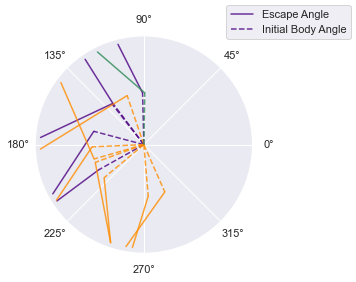

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = 'polar')
for i in range(np.shape(df)[0]):
    x0 = df['approach_ang'].iloc[i]*np.pi/180; x1 = (df['turn_ang']+df['approach_ang']+df['azimuth']).iloc[i]*np.pi/180
    plt.polar([x0,x1],[1,2],'-',color = c[int(df['ind'].iloc[i])-1],alpha = 0.8)
    plt.polar([x0,x0],[0,1],'--',color = c[int(df['ind'].iloc[i])-1],alpha = 0.8)
ax.set_yticklabels([])
ax.yaxis.grid(False)
fig.legend(['Escape Angle','Initial Body Angle'], loc = 'upper right')
plt.ylim([0,2.1]);

Comments:

**1\. Most of the change in body axis is due to the grasshopper jumping asymmetrically as opposed to turning prior to jumping.**

Just to confirm the hunch - majority of the points lie above the unity-line in a turn-angle vs. azimuth plot:

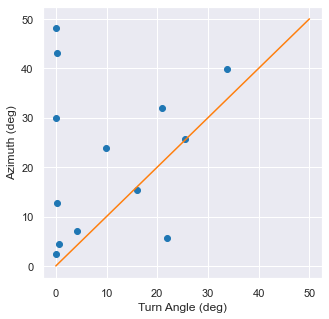

In [8]:
plt.figure(figsize = (5,5))
plt.plot(abs(df['turn_ang']), abs(df['azimuth']), 'o')
plt.plot([0,50],[0,50],'-')
plt.xlabel('Turn Angle (deg)'); plt.ylabel('Azimuth (deg)')
plt.show()

Holds! The obvious correlation in this plot is considered in a later section.

**2\. It also seems as if, the change in the grasshopper's body axis is larger when the predator approaches from behind compared to when the predator approaches from the side.**

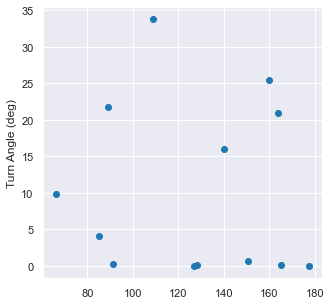

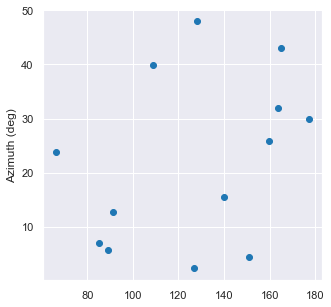

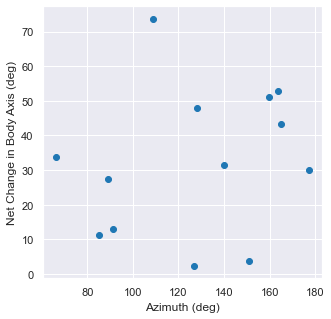

In [9]:
plt.figure(figsize = (5,5))
plt.plot(abs(df['approach_ang']), abs(df['turn_ang']), 'o')
plt.ylabel('Turn Angle (deg)'); plt.show()
plt.figure(figsize = (5,5))
plt.plot(abs(df['approach_ang']), abs(df['azimuth']), 'o')
plt.ylabel('Azimuth (deg)'); plt.show(); plt.show()
plt.figure(figsize = (5,5))
plt.plot(abs(df['approach_ang']), abs(df['azimuth']+df['turn_ang']), 'o')
plt.ylabel('Net Change in Body Axis (deg)') 
plt.xlabel('Azimuth (deg)'); plt.show()

Not a stark correlation.

**3\. But the direction of change is largely unrelated to the direction of approach.** -ve for a change in axis angle implies rightward shift, +ve implies leftward shift. +ve sign for approach angle implies predator approach from right. -ve sign implies predator approach from the left. Expectation: points should lie on (+1,+1) and (-1,-1) if direction of turning is related to predator approach.

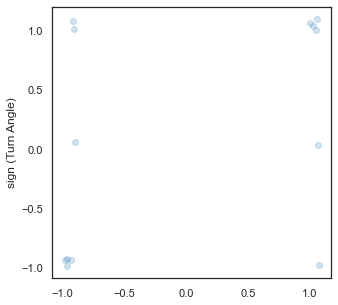

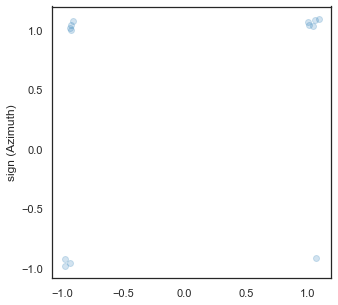

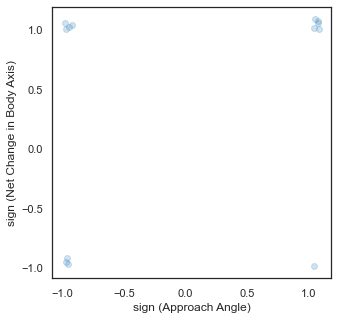

In [10]:
sns.set_style('white')
plt.figure(figsize = (5,5))
plt.plot(np.sign(df['approach_ang'])+0.1*np.random.rand(13), 
         np.sign(df['turn_ang'])+0.1*np.random.rand(13), 'o',alpha = 0.2)
plt.ylabel('sign (Turn Angle)')
plt.show();

sns.set_style('white')
plt.figure(figsize = (5,5))
plt.plot(np.sign(df['approach_ang'])+0.1*np.random.rand(13), 
         np.sign(df['azimuth'])+0.1*np.random.rand(13), 'o',alpha = 0.2)
plt.ylabel('sign (Azimuth)')
plt.show();

sns.set_style('white')
plt.figure(figsize = (5,5))
plt.plot(np.sign(df['approach_ang'])+0.1*np.random.rand(13), 
         np.sign(df['azimuth']+df['turn_ang'])+0.1*np.random.rand(13), 'o',alpha = 0.2)
plt.ylabel('sign (Net Change in Body Axis)')
plt.xlabel('sign (Approach Angle)')
plt.show(); sns.set()

**5\. Veolcity is independant of approach angle and seems to be a function of individual identity.** Likely because velocity not normalised by body size?

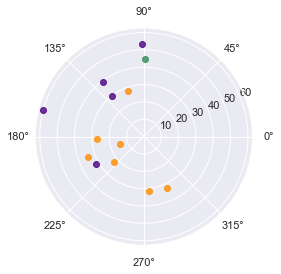

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = 'polar')
for i in range(np.shape(df)[0]):
    x0 = df['approach_ang'].iloc[i]*np.pi/180; y0 = df['vel'].iloc[i]
    plt.polar(x0,y0,'-o',color = c[int(df['ind'].iloc[i])-1],alpha = 0.8)

**6\. Take-off-angle is independant of approach angle.**

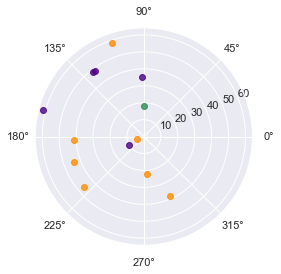

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = 'polar')
for i in range(np.shape(df)[0]):
    x0 = df['approach_ang'].iloc[i]*np.pi/180; y0 = df['take_off_ang'].iloc[i]
    plt.polar(x0,y0,'-o',color = c[int(df['ind'].iloc[i])-1],alpha = 0.8)

## Turn Angle vs. Other Parameters

**1\. There seems to be a correlation between turn angle and azimuth.**
To confirm, plot a spoke-plot between the two parameters.

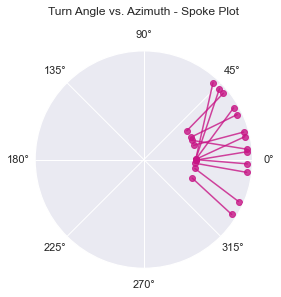

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = 'polar')
for i in range(np.shape(df)[0]):
    x0 = df['turn_ang'].iloc[i]*np.pi/180; x1 = df['azimuth'].iloc[i]*np.pi/180
    plt.polar([x0,x1],[1,2],'-o',color = 'mediumvioletred',alpha = 0.8)
ax.set_yticklabels([])
ax.yaxis.grid(False)
plt.title('Turn Angle vs. Azimuth - Spoke Plot', pad = 25)
plt.ylim([0,2.1]);

**2\. Larger take off angles seem to be associated with larger turn angles (primarily for individual 2 - the others don't show large turn angles).**

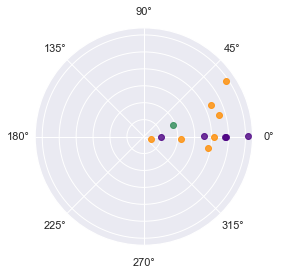

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = 'polar')
for i in range(np.shape(df)[0]):
    x0 = df['turn_ang'].iloc[i]*np.pi/180; y0 = df['take_off_ang'].iloc[i]
    plt.polar(x0,y0,'-o',color = c[int(df['ind'].iloc[i])-1],alpha = 0.8)
ax.set_yticklabels([]);

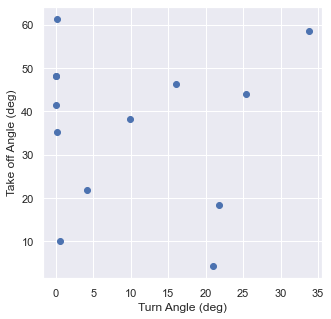

In [15]:
plt.figure(figsize = (5,5))
plt.plot(abs(df['turn_ang']), df['take_off_ang'], 'o')
plt.ylabel('Take off Angle (deg)')
plt.xlabel('Turn Angle (deg)'); plt.show()

Not a stark +ve correlation.

**3\. Velocity seems to be the opposite, in that lower turn angles are associated with larger velocity.**

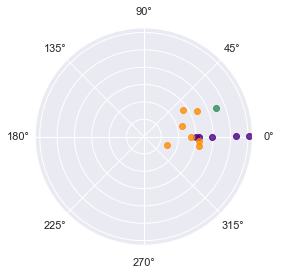

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = 'polar')
for i in range(np.shape(df)[0]):
    x0 = df['turn_ang'].iloc[i]*np.pi/180; y0 = df['vel'].iloc[i]
    plt.polar(x0,y0,'-o',color = c[int(df['ind'].iloc[i])-1],alpha = 0.8)
ax.set_yticklabels([]);

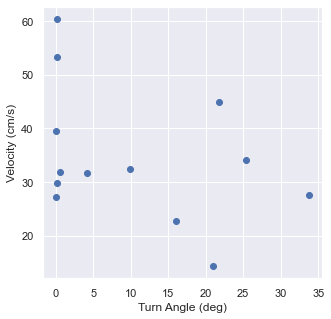

In [17]:
plt.figure(figsize = (5,5))
plt.plot(abs(df['turn_ang']), df['vel'], 'o')
plt.ylabel('Velocity (cm/s)')
plt.xlabel('Turn Angle (deg)'); plt.show()

Not a stark -ve correlation.

## Azimuth vs. Other Parameters

**1\. Larger take off angles are associated with larger azimuth!**

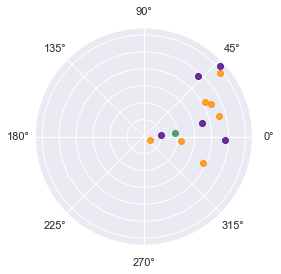

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = 'polar')
for i in range(np.shape(df)[0]):
    x0 = df['azimuth'].iloc[i]*np.pi/180; y0 = df['take_off_ang'].iloc[i]
    plt.polar(x0,y0,'-o',color = c[int(df['ind'].iloc[i])-1],alpha = 0.8)
ax.set_yticklabels([]);

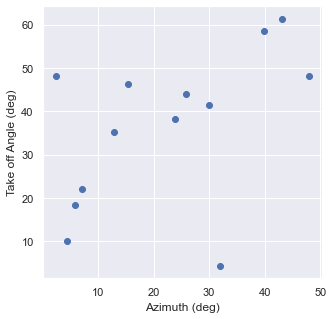

In [19]:
plt.figure(figsize = (5,5))
plt.plot(abs(df['azimuth']), df['take_off_ang'], 'o')
plt.ylabel('Take off Angle (deg)')
plt.xlabel('Azimuth (deg)'); plt.show()

**2\. Velocity is negatively correlated with azimuth.**

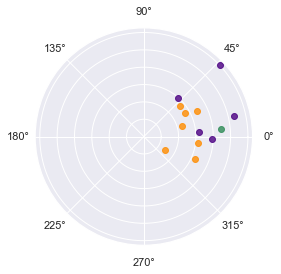

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = 'polar')
for i in range(np.shape(df)[0]):
    x0 = df['azimuth'].iloc[i]*np.pi/180; y0 = df['vel'].iloc[i]
    plt.polar(x0,y0,'-o',color = c[int(df['ind'].iloc[i])-1],alpha = 0.8)
ax.set_yticklabels([]);

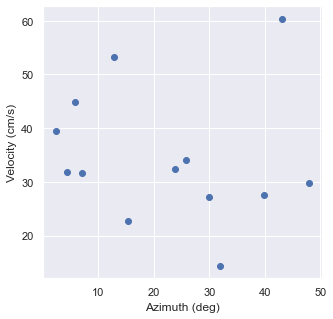

In [21]:
plt.figure(figsize = (5,5))
plt.plot(abs(df['azimuth']), df['vel'], 'o')
plt.ylabel('Velocity (cm/s)')
plt.xlabel('Azimuth (deg)'); plt.show()

## Take off Angle vs. Velocity

**1\. Obvious clustering prevents any reasonable claim.**

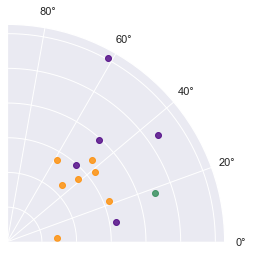

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = 'polar')
for i in range(np.shape(df)[0]):
    x0 = df['take_off_ang'].iloc[i]*np.pi/180; y0 = df['vel'].iloc[i]
    plt.polar(x0,y0,'-o',color = c[int(df['ind'].iloc[i])-1],alpha = 0.8)
ax.set_thetamin(0)
ax.set_thetamax(90)
ax.set_yticklabels([]);

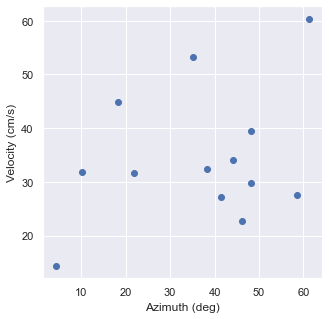

In [23]:
plt.figure(figsize = (5,5))
plt.plot((df['take_off_ang']), df['vel'], 'o')
plt.ylabel('Velocity (cm/s)')
plt.xlabel('Azimuth (deg)'); plt.show()